# Unlocking Retail Trends with Data Visualization

This project aims to extract meaningful patterns and insights from the Global Superstore dataset through effective data visualization techniques. By leveraging various chart types and visual layouts, we explore temporal trends, geographic distributions, and categorical comparisons

The dataset has the following columns:

- **Order ID**
Unique identifier for each order. One order may contain multiple items.

- **Order Date**
The date when the customer placed the order.

- **Ship Date**
The date the order was shipped to the customer.

- **Ship Mode**
The shipping method selected for the order (e.g., Standard Class, Second Class, Same Day).

- **Customer ID**
Unique identifier for each customer.

- **Segment**
The type of customer (e.g., Consumer, Corporate, Home Office).

- **City**
The city where the order was delivered.

- **State**
The state or province where the order was shipped.

- **Country**
The country in which the customer resides.

- **Postal Code**
The postal/ZIP code of the customer’s location.

- **Market**
The broader geographical market (e.g., APAC, EMEA, LATAM, US).

- **Region**
A smaller geographical area within the market (e.g., South, West).

- **Product ID**
Unique identifier for the product.

- **Category**
The main product category (e.g., Furniture, Office Supplies, Technology).

- **Sub-Category**
A more specific product classification within a category (e.g., Chairs, Phones).

- **Product Name**
The full name of the product sold.

- **Sales**
Revenue generated from the sale of the product (before discounts and costs).

- **Quantity**
Number of units of the product sold.

- **Discount**
Percentage discount applied to the product (e.g., 0.2 means 20%).

- **Profit**
The overall net profit.

- **Shipping Cost**
The cost of shipping for the product.

- **Order Priority**
The urgency level of the order (e.g., Low, Medium, High, Critical).

## Import dataset

In [22]:
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
df = pd.read_excel("Global Superstore.xlsx")
print(f"Rows, Columns: {df.shape}\n")
print(f"{df.dtypes}\n")
HTML("<div style='overflow-x: auto'>" + df.head().to_html() + "</div>")

Rows, Columns: (51290, 23)

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wireless Headset System,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## Data pre-processing

**Missing values**

In [24]:
null_counts = df.isnull().sum()
print(null_counts)

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


* Postal Code is the only field with missing values, but it is not useful for the analysis.

**Primary key**

In [25]:
print(f"Is Row ID the primary key?\n")
print(f"Unique Row ID: {df['Row ID'].nunique()}\nNumber of rows: {df.shape[0]}")

Is Row ID the primary key?

Unique Row ID: 51290
Number of rows: 51290


### Feature Engineering



In [26]:
# Date fields
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month # Month number
df['Month Name'] = df['Order Date'].dt.strftime('%b')  # Month Name
df['YearMonth'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
df['Quarter'] = 'Q' + df['Order Date'].dt.quarter.astype(str)
df['YearQuarter'] = df['Year'].astype(str) + '-' + df['Quarter'].astype(str)

# Profit Margin
df['Profit Margin'] = df['Profit']/df['Sales']

# Delivery Time: days between the order and
df['Fulfillment Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Preview
new_col = ['Order Date', 'Ship Date', 'Year', 'Month', 'Month Name', 'YearMonth', 'YearQuarter', 'Profit Margin', 'Fulfillment Days']
HTML("<div style='overflow-x: auto'>" + df[new_col].head().to_html() + "</div>")

,Order Date,Ship Date,Year,Month,Month Name,YearMonth,YearQuarter,Profit Margin,Fulfillment Days
0,2012-07-31,2012-07-31,2012,7,Jul,2012-07-01,2012-Q3,0.330000,0
1,2013-02-05,2013-02-07,2013,2,Feb,2013-02-01,2013-Q1,-0.077847,2
2,2013-10-17,2013-10-18,2013,10,Oct,2013-10-01,2013-Q4,0.177766,1
3,2013-01-28,2013-01-30,2013,1,Jan,2013-01-01,2013-Q1,-0.033376,2
4,2013-11-05,2013-11-06,2013,11,Nov,2013-11-01,2013-Q4,0.109963,1


## Profit Margin Analysis

### Trend Analysis

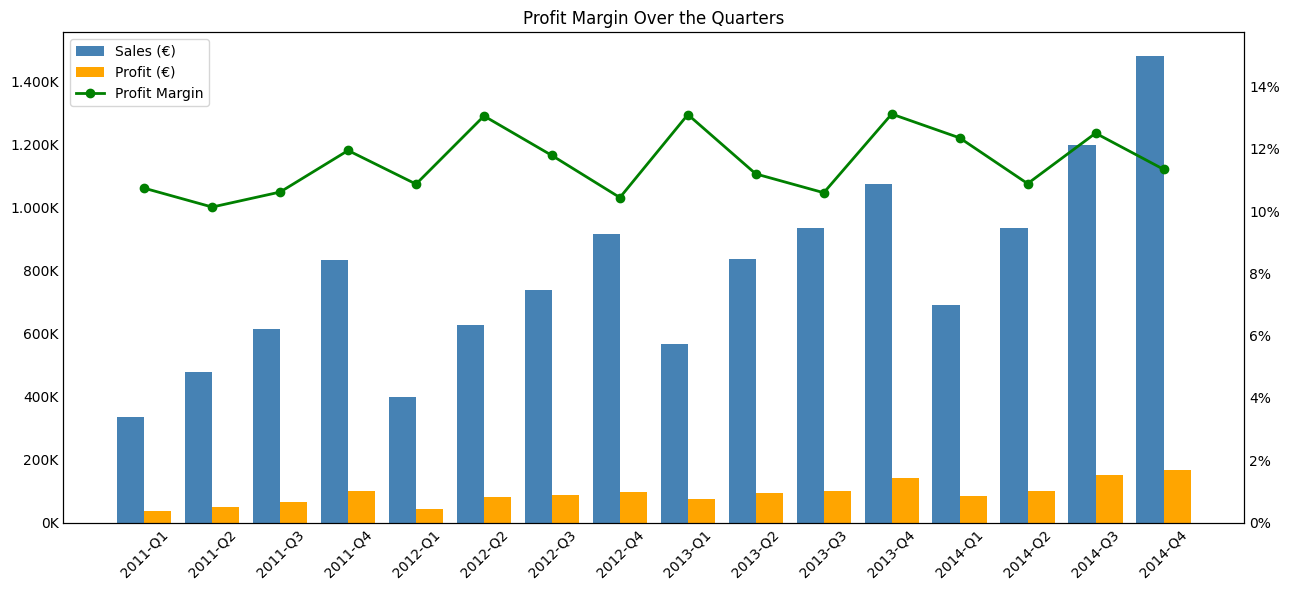

In [27]:
# Quarterly Profit Margin
quarterly = df.groupby(['YearQuarter','Year','Quarter'])[['Sales', 'Profit']].sum().reset_index()
quarterly['Profit Margin'] = quarterly['Profit']/quarterly['Sales']

# Set figure and axis
fig, ax1 = plt.subplots(figsize=(13, 6))

# Bar width
bar_width = 0.4
x = quarterly['YearQuarter']
x_idx = range(len(x))

# Plot Sales and Profit on left y-axis
ax1.bar([i - bar_width/2 for i in x_idx], quarterly['Sales'], width=bar_width, label='Sales (€)', color='steelblue')
ax1.bar([i + bar_width/2 for i in x_idx], quarterly['Profit'], width=bar_width, label='Profit (€)', color='orange')

# Format left y-axis
def format_k_euro(x, _):
    return f"{int(x/1000):,}".replace(",", ".") + "K"

ax1.set_title('Profit Margin Over the Quarters')
ax1.set_xticks(x_idx)
ax1.set_xticklabels(x, rotation=45)
ax1.tick_params(axis='y', labelcolor='black')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_k_euro))
plt.tick_params(axis='both', length=0)

# Plot Profit Margin on right y-axis
ax2 = ax1.twinx()
ax2.plot(x_idx, quarterly['Profit Margin'], color='green', marker='o', linewidth=2, label='Profit Margin')
ax2.tick_params(axis='y')
ax2.set_ylim(0, quarterly['Profit Margin'].max() * 1.2)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
plt.tick_params(axis='both', length=0)

# Legend
bars_labels, bars_handles = ax1.get_legend_handles_labels()
line_labels, line_handles = ax2.get_legend_handles_labels()
ax1.legend(bars_labels + line_labels, bars_handles + line_handles, loc='upper left')

plt.tight_layout()
plt.show()


**Insights & Observations**

* Despite the quarterly fluctuations, the overall Profit Margin performance is flat.
* Though the Sales have increased remarkably, the margin did not follow the same trend, possibly due to cost inefficiency or inadequate discount policy.
* The seasonality patterns are not evident (a monthly trend may help the identification).

### Profit Margin Analysis Across Months and Quarters

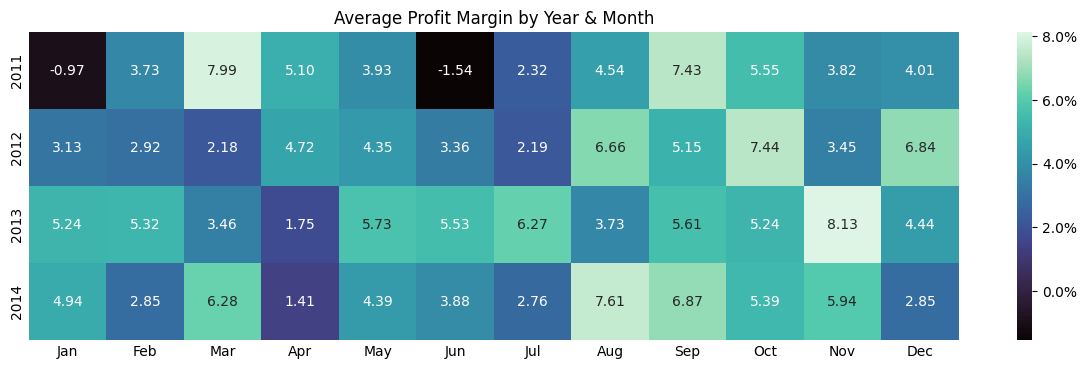

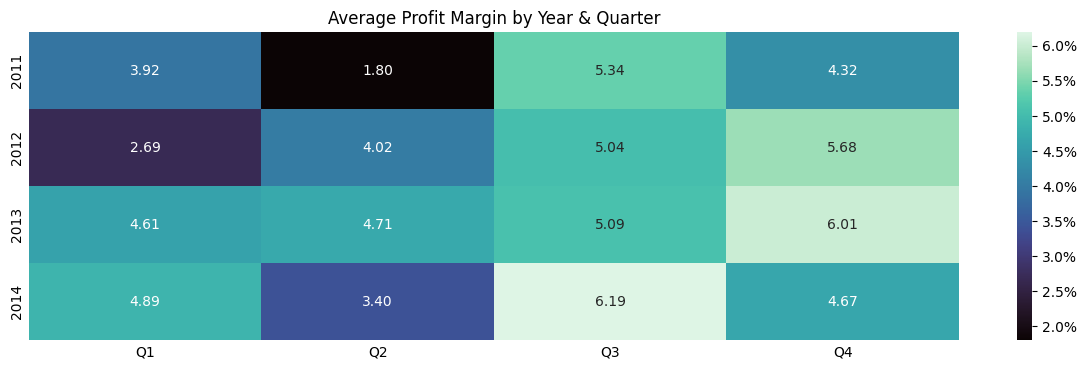

In [28]:
# Pivot Profit Margin by Year-Month

pivot_year_month = df.pivot_table(
    index = 'Year',
    columns= 'Month',
    values='Profit Margin',
    aggfunc= 'mean'
)*100

pivot_year_month.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Pivot Profit Margin by Year-Quarter

pivot_year_quarter = df.pivot_table(
    index = 'Year',
    columns= 'Quarter',
    values='Profit Margin',
    aggfunc= 'mean'
)*100

plt.figure(figsize=(15,4))

# Year-Month heatmap
ax = sns.heatmap(pivot_year_month, cmap='mako', annot=True, fmt='.2f')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.title("Average Profit Margin by Year & Month")
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='both', length=0)
plt.show()

print("")

plt.figure(figsize=(15,4))

# Year-Quarter heatmap
ax = sns.heatmap(pivot_year_quarter, cmap='mako', annot=True, fmt='.2f')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.title("Average Profit Margin by Year & Quarter")
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='both', length=0)
plt.show()

**Insights & Observations**

* Some months (e.g., November, December) often show high margins—likely due to holiday sales.
* January and June 2011 are the only months to exhibit loss.
* The average margin is the least in 2011-Q2 and 2012-Q1 and peaks in 2013-Q3 and 2014-Q4.

## Disitribution of Profit, Sales, Discount, and Quantity

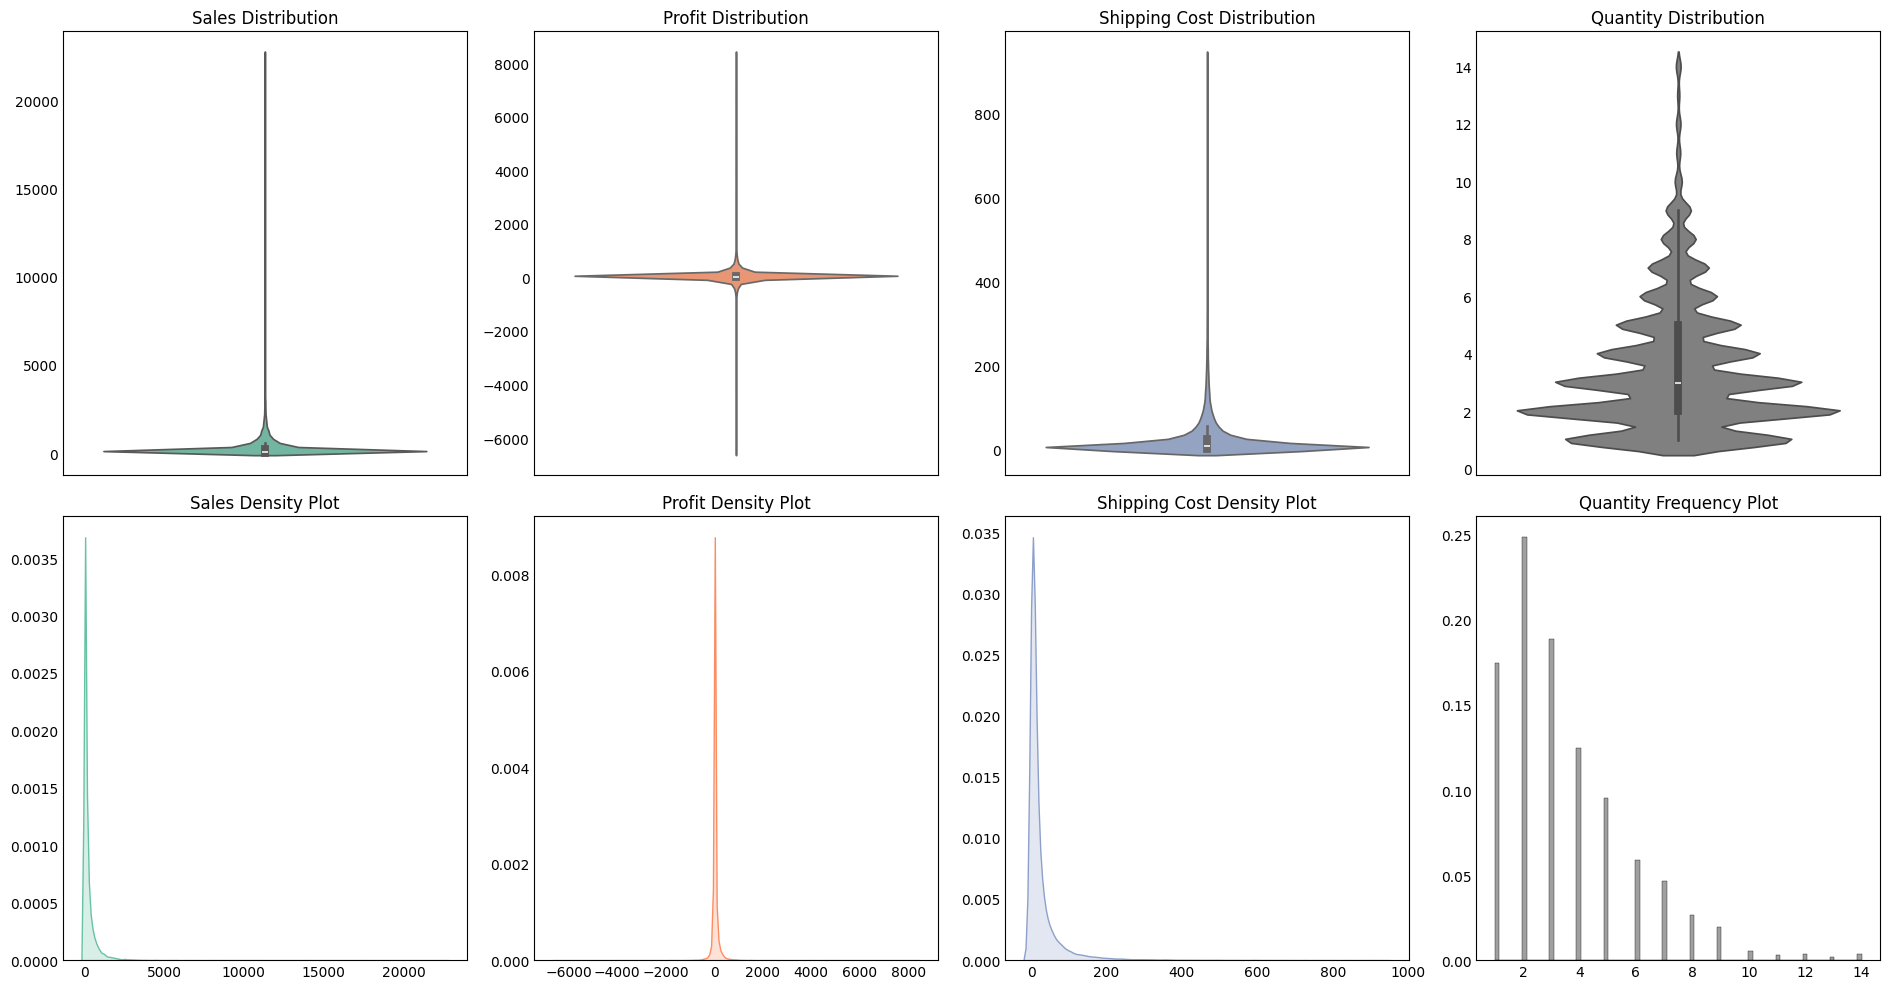

In [29]:
metrics = ['Sales', 'Profit', 'Shipping Cost', 'Quantity']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', 'grey']


fig, axes = plt.subplots(2, 4, figsize=(19, 10))

# Plot
for i, metric in enumerate(metrics):

    # Violin Plot
    sns.violinplot(y=df[metric], color=colors[i], ax=axes[0, i])
    axes[0, i].set_title(f'{metric} Distribution')
    axes[0, i].grid(False)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('')
    axes[0, i].tick_params(axis='both', length=0)

    # Density plot
    if metric == 'Quantity':
      sns.histplot(data=df, x='Quantity', stat='proportion', color='grey')
      axes[1, i].set_title(f'{metric} Frequency Plot')
    else:
      sns.kdeplot(x=df[metric], fill=True, color=colors[i], ax=axes[1, i])
      axes[1, i].set_title(f'{metric} Density Plot')
    axes[1, i].grid(False)
    axes[1, i].set_xlabel(None)
    axes[1, i].set_ylabel(None)
    axes[1, i].tick_params(axis='both', length=0)


plt.tight_layout()
plt.show()

**Insights & Observations**

* Sales distribution is right-skewed, suggesting most orders generate relatively low revenue.
* Shipping Cost distribution is right-skewed as well, suggesting most orders are relatively cheap to deliver.
* Quantity distribution skewness is less pronounced but still evident, signaling that most orders purchase relatively low quantities.
* Profit exhibit a quite symmetric distribution around 0, which suggests there may be space for better pricing policy and cost-management.

## Orders and Customers Distribution

### Segment Breakdown

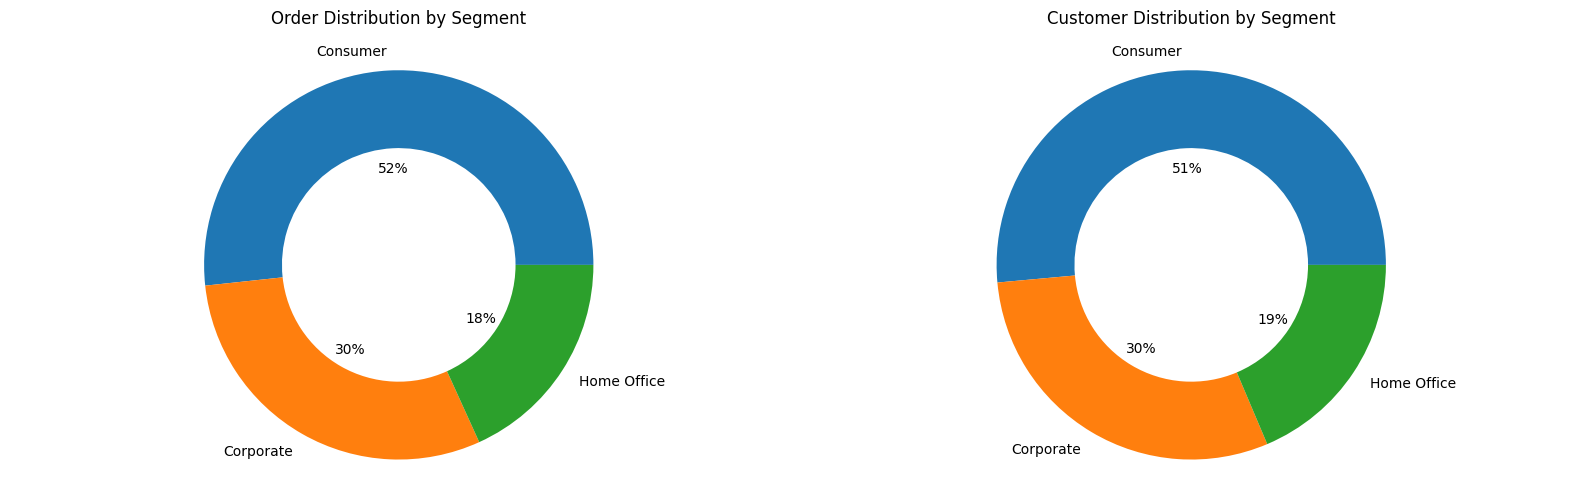

In [30]:
# Number of Orders and Customers per Segment
segment_counts = df['Segment'].value_counts().sort_index()
customer_segment = df.groupby('Segment').agg({'Customer ID' : pd.Series.nunique}).sort_index()

# Colors for pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(16, 5))

# Plot Order Distribution
plt.subplot(1, 2, 1)
plt.pie(segment_counts, labels= segment_counts.index, colors=colors, autopct='%1.0f%%', wedgeprops={'width' : 0.4},labeldistance=1.1, pctdistance=0.5)
plt.title('Order Distribution by Segment', pad=20)
plt.axis('equal')

# # Plot Customer Distribution
plt.subplot(1, 2, 2)
plt.pie(customer_segment['Customer ID'], labels= customer_segment.index, colors=colors, autopct='%1.0f%%', wedgeprops={'width' : 0.4},labeldistance=1.1, pctdistance=0.5)
plt.title('Customer Distribution by Segment', pad=20)
plt.axis('equal')

plt.tight_layout()
plt.show()

### Market Breakdown

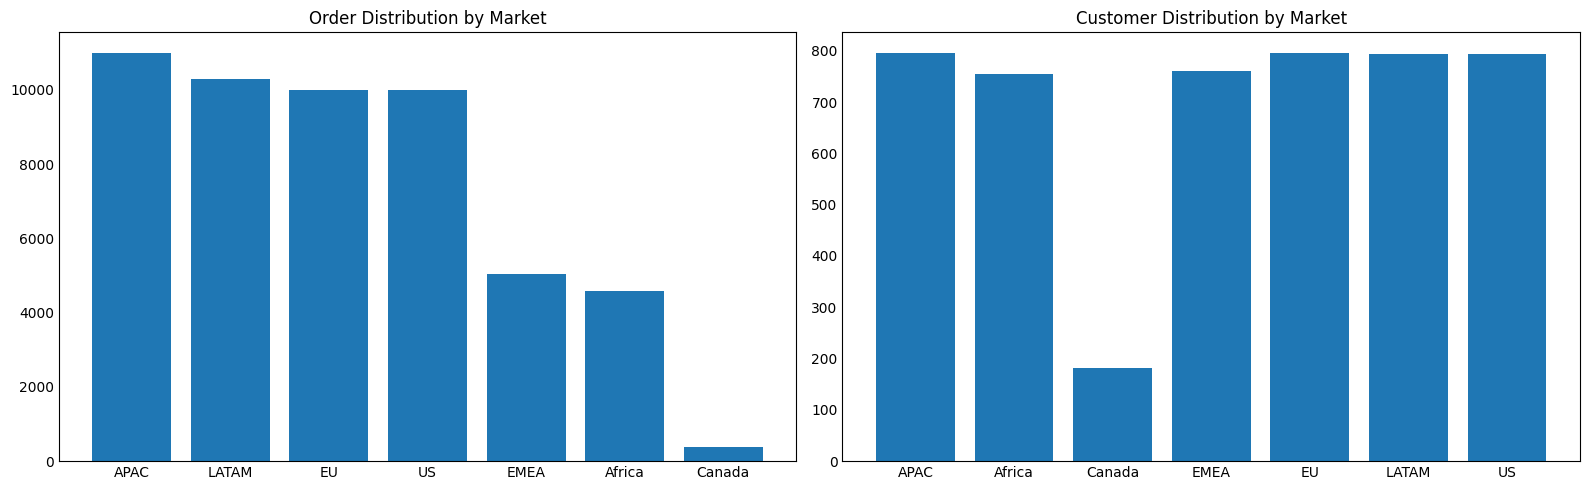

In [31]:
# Number of Orders and Customers per Market
market_counts = df['Market'].value_counts()
customer_market = df.groupby('Market').agg({'Customer ID' : pd.Series.nunique})

plt.figure(figsize=(16, 5))

# Plot Order Distribution
plt.subplot(1, 2, 1)
plt.bar(market_counts.index, market_counts.values)
plt.title('Order Distribution by Market')
plt.tick_params(axis='both', length=0)

# Plot Customer Distribution
plt.subplot(1, 2, 2)
plt.bar(customer_market.index, customer_market['Customer ID'])
plt.title('Customer Distribution by Market')
plt.tick_params(axis='both', length=0)


plt.tight_layout()
plt.show()

## Ship Mode & Order Priority Distribution

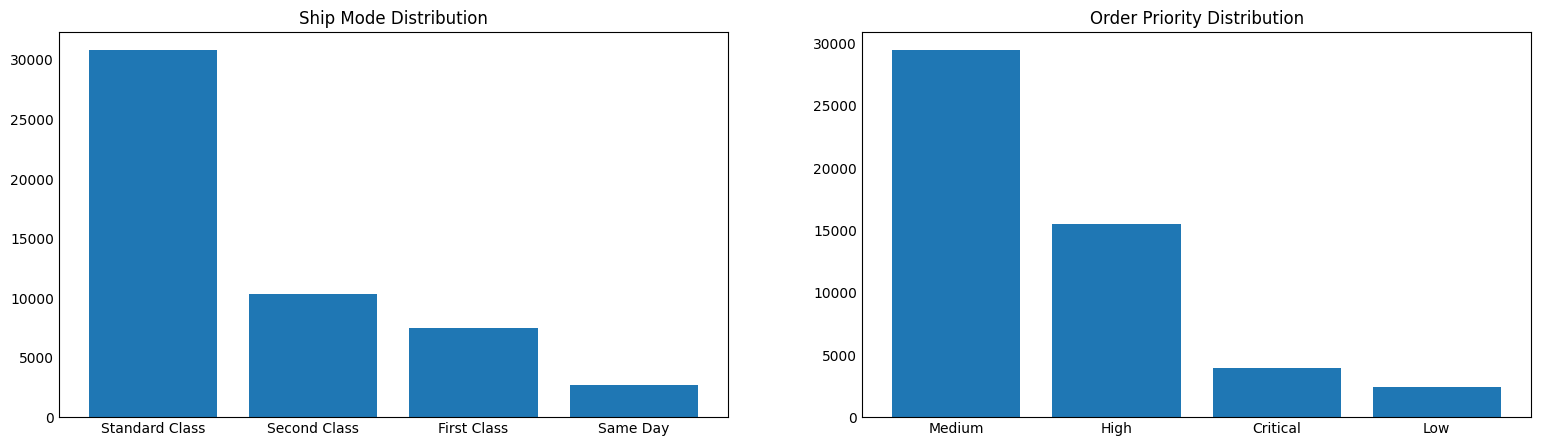

In [32]:
# Number of Orders by Ship Mode and Order Priority
ship_mode_count = df['Ship Mode'].value_counts()
priority_count = df['Order Priority'].value_counts()

plt.figure(figsize=(19, 5))

# Plot Ship Mode Distribution
plt.subplot(1, 2, 1)
plt.bar(ship_mode_count.index, ship_mode_count.values)
plt.title('Ship Mode Distribution')
plt.tick_params(axis='both', length=0)

# Plot Order Priority Distribution
plt.subplot(1, 2, 2)
plt.bar(priority_count.index, priority_count.values)
plt.title('Order Priority Distribution')
plt.tick_params(axis='both', length=0)

plt.show()

## Sales Breakdown by Top 10 Countries & Cities

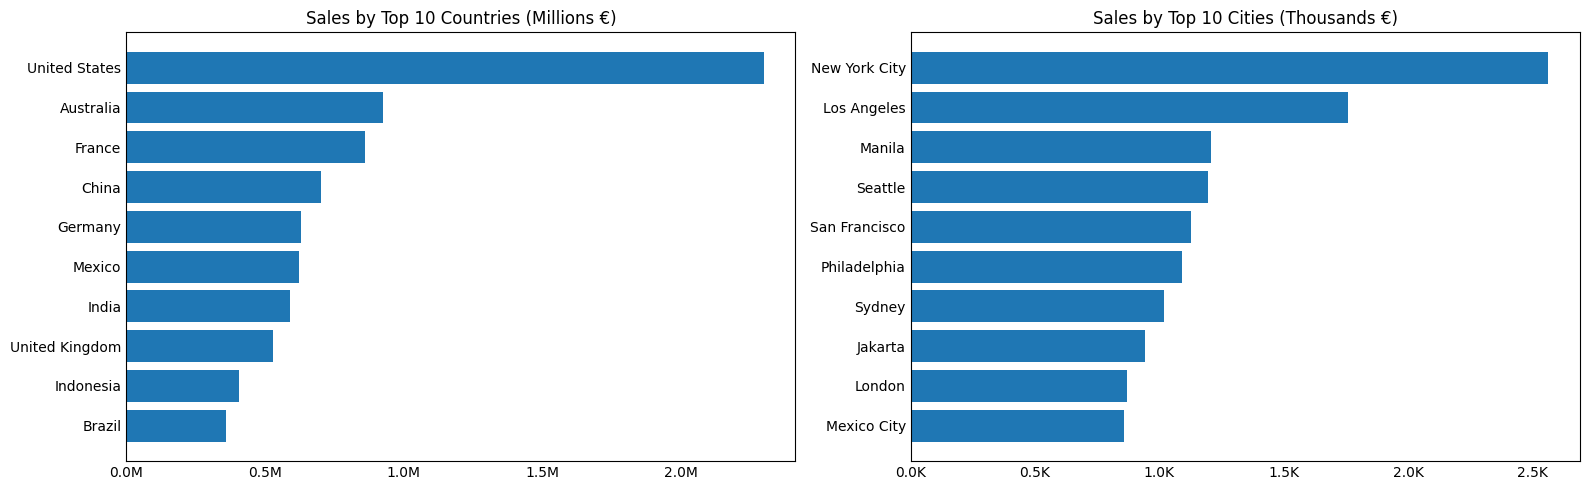

In [33]:
#top_market_sales = df.groupby('Market').agg({'Sales' : 'sum'}).sort_values('Sales',ascending=True)
top_country_sales = df.groupby('Country').agg({'Sales' : 'sum'}).sort_values('Sales',ascending=True).tail(10)
top_region_sales = df.groupby('City').agg({'Sales' : 'sum'}).sort_values('Sales',ascending=True).tail(10)

plt.figure(figsize=(16,5))

# Plot Sales by Country
plt.subplot(1, 2, 1)
plt.barh(top_country_sales.index, width=top_country_sales['Sales'])
plt.title("Sales by Top 10 Countries (Millions €)")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tick_params(axis='both', length=0)

# Plot Sales by City
plt.subplot(1, 2, 2)
plt.barh(top_region_sales.index, width=top_region_sales['Sales'])
plt.title("Sales by Top 10 Cities (Thousands €)")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e5:.1f}K'))
plt.tick_params(axis='both', length=0)

plt.tight_layout()
plt.show()

## Sales and Profit Breakdown by Top 10 Sub-Categories

In [34]:
# Step 1: Sum sales by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum()

# Step 2: Select top 10 Sub-Categories
top_subcats = subcat_sales.sort_values(ascending=False).head(10).index.tolist()

# Step 3: Filter dataframe to include only top Sub-Categories
filtered_df = df[df['Sub-Category'].isin(top_subcats)]

# Step 4: Group by Category and Sub-Category
grouped_filtered = filtered_df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Step 5: Create sunburst chart
fig = px.sunburst(grouped_filtered, path=['Category','Sub-Category'], values = 'Sales', color = 'Profit')

fig.update_layout(
    title={
        'text': 'Sales and Profit Breakdown by Top 10 Sub-Categories',
        'x': 0.5,               # Center the title
        'xanchor': 'center',
        'font': {
            'size': 20  # 👈 Adjust the number to increase/decrease font size
        }
    },
    width=900,
    height=500,
    margin=dict(t=60, b=20)    # t = top margin, b = bottom margin (reduce here)
)

fig.show()


## Profit Inefficiency Analysis

In [35]:
# Group by Sub-Category and aggregate the required metrics
grouped_subcat = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount' : 'mean',
    'Shipping Cost' : 'mean'
}).reset_index()

#print(grouped_subcat.head())

# Create the filtered bubble chart
fig = px.scatter(grouped_subcat, x = 'Sales', y = 'Profit', size = 'Discount', color= 'Discount', title = 'Sales vs Profit by Discount', hover_name='Sub-Category')
fig.show()
fig = px.scatter(grouped_subcat, x = 'Sales', y = 'Profit', size = 'Shipping Cost', color= 'Shipping Cost', title = 'Sales vs Profit by Shipping Cost', hover_name='Sub-Category')
fig.show()


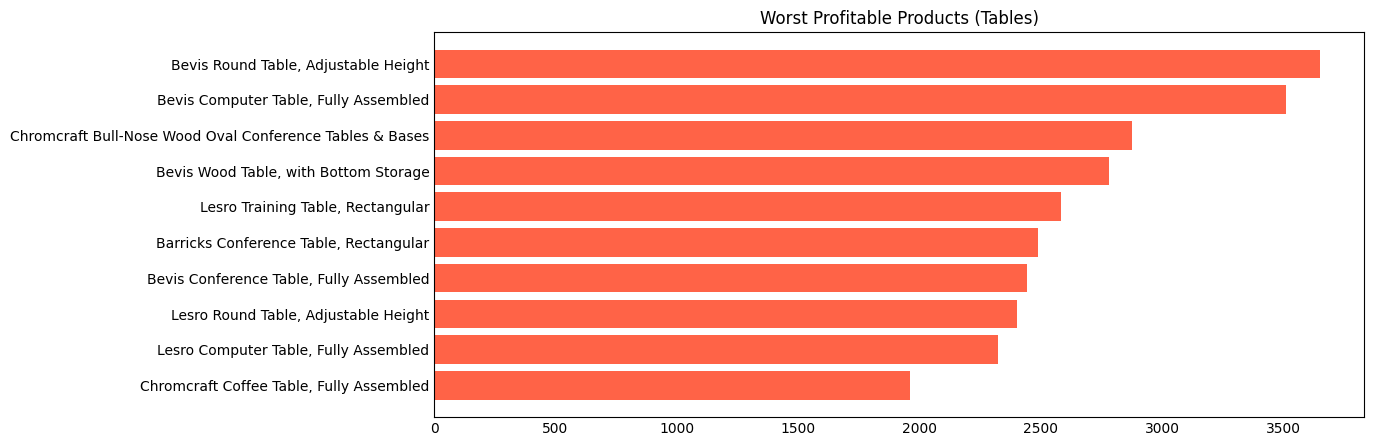

In [36]:
# Worst 10 profitable products
sub_categories_loss = grouped_subcat.loc[grouped_subcat['Profit'] < 0, 'Sub-Category'].unique()
product_loss = df.loc[df['Sub-Category'].isin(sub_categories_loss)].groupby('Product Name').agg({'Profit' : 'sum'}).sort_values('Profit', ascending=False).tail(10)

# Plot
plt.figure(figsize=(12, 5))
plt.barh(product_loss.index, abs(product_loss['Profit']), color='tomato')
plt.title("Worst Profitable Products (Tables)")
plt.tick_params(axis='both', length=0)

## Shipping Performance Analysis

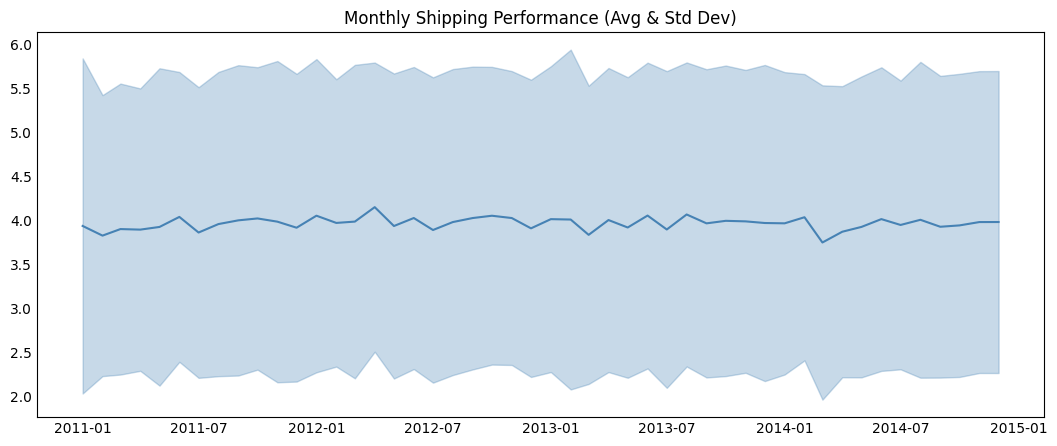

In [37]:
# Monthly Average & Standard Deviation of Fulfillment Time
monthly = df.groupby(['YearMonth', 'Year', 'Month Name']).agg(
    Avg_Delivery_Time=('Fulfillment Days', 'mean'),
    Std_Delivery_Time=('Fulfillment Days', 'std')
).reset_index()

x = monthly['YearMonth']
y = monthly['Avg_Delivery_Time']

# Plot
plt.figure(figsize=(13, 5))

plt.plot(x, y, label = 'Avg Shipment Days', color = 'steelblue')
plt.fill_between(x, y - monthly['Std_Delivery_Time'], y + monthly['Std_Delivery_Time'], color = 'steelblue', alpha = 0.3, label = 'Variability')
plt.title('Monthly Shipping Performance (Avg & Std Dev)')
plt.tick_params(axis='both', length=0)

plt.show()

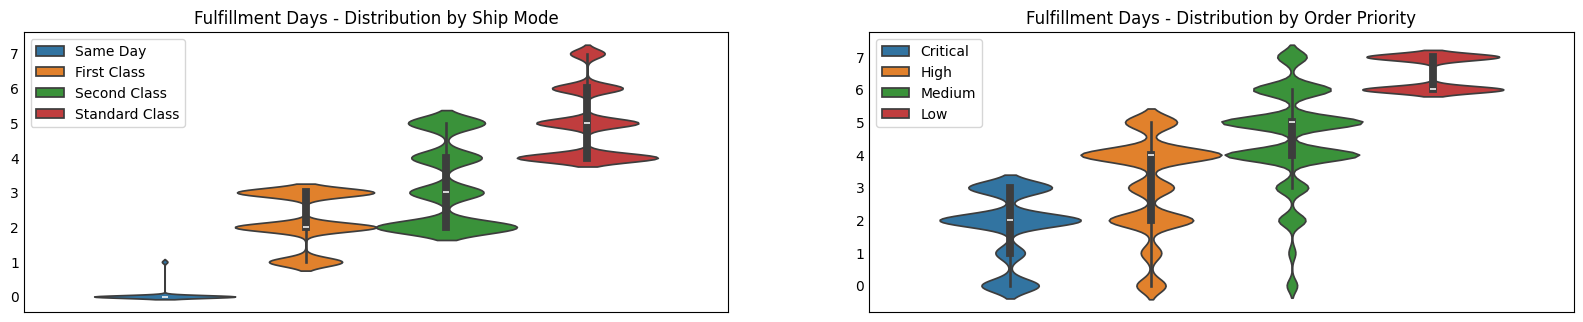

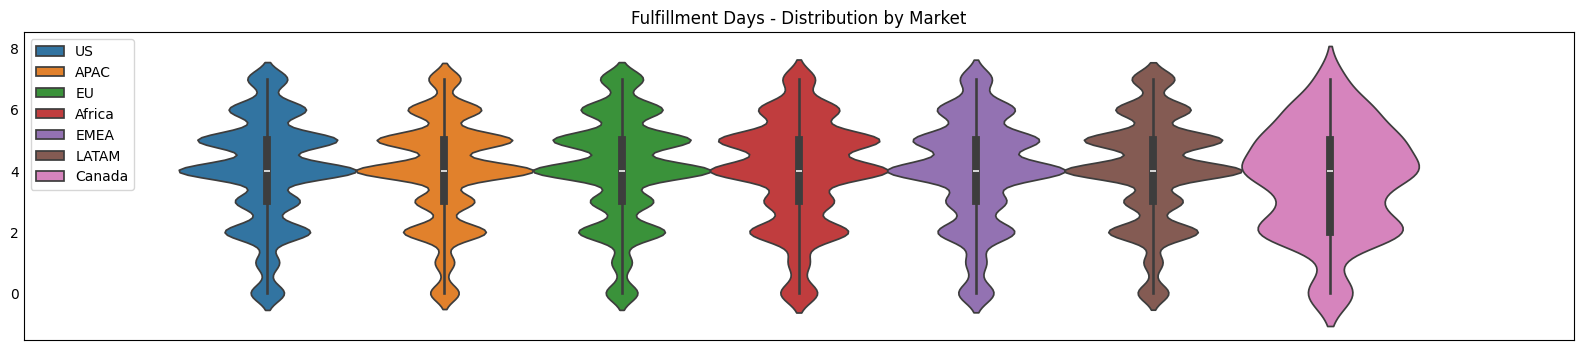

In [38]:
plt.figure(figsize=(20, 8))

# Plot Fulfillment Days - Ship Mode Distribution
plt.subplot(2, 2, 1)
sns.violinplot(df, y = 'Fulfillment Days', hue='Ship Mode', hue_order= ['Same Day', 'First Class', 'Second Class', 'Standard Class'])
plt.title(f'Fulfillment Days - Distribution by Ship Mode')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc='upper left')
plt.tick_params(axis='both', length=0)

# Plot Fulfillment Days - Order Priority Distribution
plt.subplot(2, 2, 2)
sns.violinplot(df, y = 'Fulfillment Days', hue='Order Priority', hue_order=['Critical', 'High', 'Medium', 'Low'])
plt.title(f'Fulfillment Days - Distribution by Order Priority')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc='upper left')
plt.tick_params(axis='both', length=0)

plt.show()

# Plot Fulfillment Days - Market Distribution
plt.figure(figsize=(20,4))
sns.violinplot(df, y = 'Fulfillment Days', hue='Market')
plt.title(f'Fulfillment Days - Distribution by Market')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc='upper left')
plt.tick_params(axis='both', length=0)

plt.show()